We did an end-to-end case for the past two weeks to give you a broad overview of what a data science project could look like using the CRISP-DM framework. From now on we'll take a slower, more methodological approach to ensure you are capable of taking on such a project yourself.

<img src="images\Logo_UCLL_ENG_RGB.png" style="background-color:white;" />

# Data Analytics & Machine learning

Lecturers: Aimée Lynn Backiel, Kenric Borgelioen, and Daan Nijs

Academic year 2024-2025

## Lab 7 Part 2: End-to-end exercise + classification

### Lecture outline

1. One large exercise covering all we have done so far in this course applied to classification.

### Recap of last lecture(s)

#### Lab 1

1. We ensured we had a valid Python installation.
2. We learnt what a virtual environment is:
   * Isolated Python executable and packages.
   * We created a virtual environment.
3. Absolute path vs relative path recap.
4. Recap of data structures in Python

#### Lab 2
1. Installed Pandas
2. Learnt how to read data
3. Learnt how to calculate mean, mode, median etc.
4. Basic exploration of the 4 variables

#### Lab 3
1. Wrapped up computing summary statistics (mean, median, mode, ...)
2. Learnt how to deal with outliers 
3. Focused on exploration of dat

#### Lab 4
1. Univariate data visualization using Matplotlib
   1. Figures and axes
   2. Histograms
   3. Box plots
   4. Bar charts
2. Multivariate data visualization using Seaborn
   1. Scatter plots
   2. Small multiples
   3. Color coding

#### Lab 5
1. Intro to machine learning using scikit-learn
   1. Preprocessing
      1. One Hot encoding
      2. Scaling
      3. Outliers
   2. Regression

#### Lab 6
1. Preprocessing with scikit-learn
   1. ColumnTransformer: Apply a transformation to specific columns.
   2. Pipeline: Do several transformations after each other
2. Evaluation:
   1. Why the mean of the error is a bad idea
   2. Mean absolute error
   3. Mean squared error

### Lab 7
1. Feature engineering
   1. Binning
   2. Interactions
   3. Custom features
2. Rounding up model evaluation
   1. Cross validation
   2. Hyper parameter tuning

#### Our next case: Hotel booking dataset

source: https://www.sciencedirect.com/science/article/pii/S2352340918315191

*This data article describes two datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Both hotels are located in Portugal: H1 at the resort region of Algarve and H2 at the city of Lisbon.*

The goal is to help the two hotels maximize their revenue.



|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|hotel                          |character | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|is_canceled                    |double    | Value indicating if the booking was canceled (1) or not (0) |
|lead_time                      |double    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|arrival_date_year              |double    | Year of arrival date|
|arrival_date_month             |character | Month of arrival date|
|arrival_date_week_number       |double    | Week number of year for arrival date|
|arrival_date_day_of_month      |double    | Day of arrival date|
|stays_in_weekend_nights        |double    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights           |double    |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|adults                         |double    | Number of adults|
|children                       |double    | Number of children|
|babies                         |double    |Number of babies |
|meal                           |character | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|country                        |character | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|market_segment                 |character | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|distribution_channel           |character | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|is_repeated_guest              |double    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|previous_cancellations         |double    | Number of previous bookings that were cancelled by the customer prior to the current booking |
|previous_bookings_not_canceled |double    | Number of previous bookings not cancelled by the customer prior to the current booking |
|reserved_room_type             |character | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|assigned_room_type             |character | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|booking_changes                |double    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|deposit_type                   |character | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|agent                          |character | ID of the travel agency that made the booking |
|company                        |character | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|days_in_waiting_list           |double    | Number of days the booking was in the waiting list before it was confirmed to the customer |
|customer_type                  |character | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|adr                            |double    | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|required_car_parking_spaces    |double    | Number of car parking spaces required by the customer |
|total_of_special_requests      |double    | Number of special requests made by the customer (e.g. twin bed or high floor)|
|reservation_status             |character | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|reservation_status_date        |double    | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|





In [5]:
#%pip install pandas
import pandas as pd

In [58]:
h1 = pd.read_csv("data/H1_kaggle.csv")
h1.head()

is_canceled  lead_time  arrival_date_year arrival_date_month  \
0            0        342               2015               July   
1            0        737               2015               July   
2            0          7               2015               July   
3            0         13               2015               July   
4            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        0                     0       2         0  ...   
1                        0                     0       2         0  ...   
2                        0                     1       1         0  ...   
3                        0                     1       1         0  ...   
4                        0                     2       2         0  ...   

   customer_type   adr required_car_parking_spaces total_of_special_requests  \
0      Transient   0.0                           0                         0   
1      Transient   0.0                           0                         0   
2      Transient  75.0                           0                         0   
3      Transient  75.0                           0                         0   
4      Transient  98.0                           0                         1   

  reservation_status  reservation_status_date            name  \
0          Check-Out                 7/1/2015   Ernest Barnes   
1          Check-Out                 7/1/2015    Andrea Baker   
2          Check-Out                 7/2/2015  Rebecca Parker   
3          Check-Out                 7/2/2015    Laura Murray   
4          Check-Out                 7/3/2015     Linda Hines   

                         email  phone-number       credit_card  
0  Ernest.Barnes31@outlook.com  669-792-1661  ************4322  
1       Andrea_Baker94@aol.com  858-637-6955  ************9157  
2   Rebecca_Parker@comcast.net  652-885-2745  ************3734  
3            Laura_M@gmail.com  364-656-8427  ************5677  
4           LHines@verizon.com  713-226-5883  ************5498  

[5 rows x 35 columns]

In [59]:
h2 = pd.read_csv("data/H2_kaggle.csv")
h2.head()

is_canceled  lead_time  arrival_date_year arrival_date_month  \
0            0          6               2015               July   
1            1         88               2015               July   
2            1         65               2015               July   
3            1         92               2015               July   
4            1        100               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          2   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        0                     2       1       0.0  ...   
1                        0                     4       2       0.0  ...   
2                        0                     4       1       0.0  ...   
3                        2                     4       2       0.0  ...   
4                        0                     2       2       0.0  ...   

   customer_type   adr required_car_parking_spaces total_of_special_requests  \
0      Transient   0.0                           0                         0   
1      Transient  76.5                           0                         1   
2      Transient  68.0                           0                         1   
3      Transient  76.5                           0                         2   
4      Transient  76.5                           0                         1   

  reservation_status  reservation_status_date            name  \
0          Check-Out                 7/3/2015  Elizabeth Ross   
1           Canceled                 7/1/2015    Adam Aguilar   
2           Canceled                4/30/2015     Mark Keller   
3           Canceled                6/23/2015     Sarah Scott   
4           Canceled                 4/2/2015     Misty Perry   

                     email  phone-number       credit_card  
0   Ross.Elizabeth@att.com  313-076-6204  ************4378  
1     AAguilar@comcast.net  796-281-4143  ************2797  
2  Mark_Keller@hotmail.com  227-821-0234  ************9384  
3         SScott88@aol.com  443-817-6604  ************7979  
4        Misty.P68@att.com  801-946-4619  ************4844  

[5 rows x 35 columns]

#### ❓ The first thing we need to decide is what we want to do with this dataset. We have many different variables and thus things we can do. What would you do with this dataset?

1. Finding out who cancels reservations (classifcation)
2. Finding groups in the customers (clustering)
3. Predicting the amount of rooms to be booked on a given day (regression)
4. ...

We will focus on the first.

The first goal, finding out who cancels, is **predicting a categorical value**. `isCanceled` is a number but in our dataset it should be regarded as a discrete category. This is called **classification**. When doing classification we will need slightly different machine learning models but most importantly, we will need different evaluation metrics. The full details are discussed in the theory sessions.

We still start of by doing exploring the dataset using Pandas exclusively and move on to some plots later on. The choice of which tool to use is yours. In this session we will be

In [60]:
h1["hotel"] = "Resort hotel"
h2["hotel"] = "City hotel"
hotel_df = pd.concat([h1, h2], ignore_index=True)

In [61]:
hotel_df

is_canceled  lead_time  arrival_date_year arrival_date_month  \
0                 0        342               2015               July   
1                 0        737               2015               July   
2                 0          7               2015               July   
3                 0         13               2015               July   
4                 0         14               2015               July   
...             ...        ...                ...                ...   
119385            0         23               2017             August   
119386            0        102               2017             August   
119387            0         34               2017             August   
119388            0        109               2017             August   
119389            0        205               2017             August   

        arrival_date_week_number  arrival_date_day_of_month  \
0                             27                          1   
1                             27                          1   
2                             27                          1   
3                             27                          1   
4                             27                          1   
...                          ...                        ...   
119385                        35                         30   
119386                        35                         31   
119387                        35                         31   
119388                        35                         31   
119389                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                             0                     0       2       0.0  ...   
1                             0                     0       2       0.0  ...   
2                             0                     1       1       0.0  ...   
3                             0                     1       1       0.0  ...   
4                             0                     2       2       0.0  ...   
...                         ...                   ...     ...       ...  ...   
119385                        2                     5       2       0.0  ...   
119386                        2                     5       3       0.0  ...   
119387                        2                     5       2       0.0  ...   
119388                        2                     5       2       0.0  ...   
119389                        2                     7       2       0.0  ...   

           adr required_car_parking_spaces total_of_special_requests  \
0         0.00                           0                         0   
1         0.00                           0                         0   
2        75.00                           0                         0   
3        75.00                           0                         0   
4        98.00                           0                         1   
...        ...                         ...                       ...   
119385   96.14                           0                         0   
119386  225.43                           0                         2   
119387  157.71                           0                         4   
119388  104.40                           0                         0   
119389  151.20                           0                         2   

       reservation_status reservation_status_date                name  \
0               Check-Out                7/1/2015       Ernest Barnes   
1               Check-Out                7/1/2015        Andrea Baker   
2               Check-Out                7/2/2015      Rebecca Parker   
3               Check-Out                7/2/2015        Laura Murray   
4               Check-Out                7/3/2015         Linda Hines   
...                   ...                     ...                 ...   
119385          Check-Out                9/6/2017

### Data understanding

Business people might  questions like:

Are we booking rooms correctly in our system? Do all bookings have quests?

Where do the guests come from?

How much do they pay per night?

Does the price vary per time of the year?

When are the hotels the busiest?

How long do customers stay? Are there any noticeable differences?

When and for which type of customers do the biggest cancellations happen?

We will try and answer all of these.

In [68]:
(hotel_df['stays_in_weekend_nights']+hotel_df['stays_in_week_nights'] == 0 ).sum()

715

In [63]:
hotel_df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
required_car_parking_spaces            0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
is_canceled                            0
assigned_room_type                     0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
name                                   0
email                                  0
phone-number                           0
credit_card                            0
booking_changes                        0
reserved_room_type                     0
lead_time                              0
previous_bookings_not_canceled         0
previous_cancellations                 0
is_repeated_guest                      0
distribution_cha

In [12]:
# ❓ What would you do with the missing values. (hint: df.fillna)
nan_replacements = {"Children:": 0.0,"Country": "Unknown", "Agent": -1, "Company": -1}

hotel_df = hotel_df.fillna(nan_replacements)
hotel_df["Company"].replace("NULL",9999)
hotel_df.head()


IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0       342             2015             July   
1           0       737             2015             July   
2           0         7             2015             July   
3           0        13             2015             July   
4           0        14             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     0   
4                     27                      1                     0   

   StaysInWeekNights  Adults  Children  ...        Agent      Company  \
0                  0       2       0.0  ...         NULL         NULL   
1                  0       2       0.0  ...         NULL         NULL   
2                  1       1       0.0  ...         NULL         NULL   
3                  1       1       0.0  ...          304         NULL   
4                  2       2       0.0  ...          240         NULL   

  DaysInWaitingList CustomerType   ADR  RequiredCarParkingSpaces  \
0                 0    Transient   0.0                         0   
1                 0    Transient   0.0                         0   
2                 0    Transient  75.0                         0   
3                 0    Transient  75.0                         0   
4                 0    Transient  98.0                         0   

   TotalOfSpecialRequests  ReservationStatus ReservationStatusDate  \
0                       0          Check-Out            2015-07-01   
1                       0          Check-Out            2015-07-01   
2                       0          Check-Out            2015-07-02   
3                       0          Check-Out            2015-07-02   
4                       1          Check-Out            2015-07-03   

          hotel  
0  Resort hotel  
1  Resort hotel  
2  Resort hotel  
3  Resort hotel  
4  Resort hotel  

[5 rows x 32 columns]

In [13]:
# ❓ Do all bookings have guests? 
zeroRows = hotel_df["Adults"] + hotel_df["Children"] + hotel_df["Babies"] == 0
zeroRows.sum()
#zeroRowsIndexes = hotel_df.loc[zeroRows].index
#hotel_df = hotel_df.drop(zeroRowsIndexes)


180

In [14]:
# ❓ How much do they pay per night?

hotel_df["ADR"].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: ADR, dtype: float64

In [15]:
# ❓ Where do the guests come from?
hotel_df.value_counts('Country')

Country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
NCL        1
SDN        1
NIC        1
NPL        1
KIR        1
Name: count, Length: 178, dtype: int64

In [16]:
# ❓ Does the price vary per time of the year?

hotel_df.groupby("ArrivalDateMonth")["ADR"].describe()

count        mean        std   min      25%     50%  \
ArrivalDateMonth                                                          
April             11089.0  100.380790  38.193729  0.00  77.0000   96.30   
August            13877.0  140.111523  61.657384  0.00  95.0000  130.50   
December           6780.0   81.076776  42.731774  0.00  58.2750   75.00   
February           8068.0   73.582276  30.092552  0.00  56.0000   75.00   
January            5929.0   70.361241  28.373005  0.00  51.0000   71.00   
July              12661.0  126.788013  52.064455  0.00  90.0000  118.10   
June              10939.0  116.672192  38.773671  0.00  92.0000  115.00   
March              9794.0   80.679646  63.101354 -6.38  62.0000   79.20   
May               11791.0  108.695516  42.875641  0.00  80.1000  108.00   
November           6794.0   73.794962  33.313240  0.00  51.8400   73.00   
October           11160.0   87.908879  36.281047  0.00  62.0000   85.67   
September         10508.0  105.049657  43.004095  0.00  74.8975  100.30   

                       75%      max  
ArrivalDateMonth                     
April             119.0000   336.00  
August            180.0000   450.00  
December           96.0000   451.50  
February           87.3000   284.20  
January            85.0000   284.20  
July              155.1000   508.00  
June              135.0000   333.67  
March              95.6925  5400.00  
May               132.6000   510.00  
November           90.0000   260.00  
October           109.6500   300.00  
September         130.0000   345.00

In [17]:
# ❓ When are the hotels the busiest?

hotel_df.value_counts("ArrivalDateMonth")

ArrivalDateMonth
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64

In [18]:
# ❓ How long do customers stay? Are there any noticeable differences?

hotel_df["stayLength"] = hotel_df.StaysInWeekNights + hotel_df.StaysInWeekendNights
hotel_df["stayLength"].describe()

count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: stayLength, dtype: float64

In [19]:
# ❓ How long do customers stay? Are there any noticeable differences?

hotel_df.groupby("ArrivalDateMonth")["stayLength"].describe()

count      mean       std  min  25%  50%  75%   max
ArrivalDateMonth                                                       
April             11089.0  3.366850  2.015892  0.0  2.0  3.0  4.0  33.0
August            13877.0  3.896880  2.666662  0.0  2.0  3.0  5.0  60.0
December           6780.0  3.222566  2.368823  0.0  2.0  3.0  4.0  29.0
February           8068.0  3.031111  2.662104  0.0  2.0  3.0  4.0  45.0
January            5929.0  2.971496  3.225086  0.0  1.0  2.0  3.0  56.0
July              12661.0  3.925835  2.821876  0.0  2.0  3.0  5.0  69.0
June              10939.0  3.575830  2.579329  0.0  2.0  3.0  4.0  28.0
March              9794.0  3.419338  2.817010  0.0  2.0  3.0  4.0  49.0
May               11791.0  3.276567  2.188704  0.0  2.0  3.0  4.0  21.0
November           6794.0  3.189137  2.549263  0.0  2.0  3.0  4.0  35.0
October           11160.0  3.126075  2.094796  0.0  2.0  3.0  4.0  30.0
September         10508.0  3.466407  2.551891  0.0  2.0  3.0  4.0  57.0

In [20]:
# ❓ Analyze the bookings per market segment

hotel_df["MarketSegment"].value_counts()

MarketSegment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [21]:
# ❓ Analyze the bookings per market segment

hotel_df.groupby("MarketSegment")["ADR"].describe()

count        mean        std    min   25%    50%    75%  \
MarketSegment                                                              
Aviation         237.0  100.142110  21.796583   0.00  95.0   95.0  110.0   
Complementary    743.0    2.886366  14.036958   0.00   0.0    0.0    0.0   
Corporate       5295.0   69.358952  31.775084   0.00  42.0   65.0   88.0   
Direct         12606.0  115.445175  59.283482   0.00  75.0  105.0  150.0   
Groups         19811.0   79.479472  32.527793  -6.38  62.0   70.0   95.0   
Offline TA/TO  24219.0   87.354783  47.968695   0.00  68.0   85.5  108.0   
Online TA      56477.0  117.197063  48.854802   0.00  85.0  109.8  142.0   
Undefined          2.0   15.000000   4.242641  12.00  13.5   15.0   16.5   

                  max  
MarketSegment          
Aviation        193.5  
Complementary   170.0  
Corporate       508.0  
Direct          451.5  
Groups          367.0  
Offline TA/TO  5400.0  
Online TA       450.0  
Undefined        18.0

In [22]:
# ❓ When and for which type of customers do the biggest cancellations happen?

hotel_df.groupby("ArrivalDateMonth")["IsCanceled"].describe()

count      mean       std  min  25%  50%  75%  max
ArrivalDateMonth                                                      
April             11089.0  0.407972  0.491480  0.0  0.0  0.0  1.0  1.0
August            13877.0  0.377531  0.484787  0.0  0.0  0.0  1.0  1.0
December           6780.0  0.349705  0.476912  0.0  0.0  0.0  1.0  1.0
February           8068.0  0.334160  0.471725  0.0  0.0  0.0  1.0  1.0
January            5929.0  0.304773  0.460350  0.0  0.0  0.0  1.0  1.0
July              12661.0  0.374536  0.484022  0.0  0.0  0.0  1.0  1.0
June              10939.0  0.414572  0.492670  0.0  0.0  0.0  1.0  1.0
March              9794.0  0.321523  0.467085  0.0  0.0  0.0  1.0  1.0
May               11791.0  0.396658  0.489225  0.0  0.0  0.0  1.0  1.0
November           6794.0  0.312334  0.463479  0.0  0.0  0.0  1.0  1.0
October           11160.0  0.380466  0.485523  0.0  0.0  0.0  1.0  1.0
September         10508.0  0.391702  0.488154  0.0  0.0  0.0  1.0  1.0

#### Data exploration with plots

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [24]:
hotel_df["YearMonth"] = hotel_df["ArrivalDateYear"].astype(str) + hotel_df[ "ArrivalDateMonth"]

hotel_df["YearMonth"]

<Axes: title={'center': 'Bookings per year-month'}, xlabel='YearMonth'>

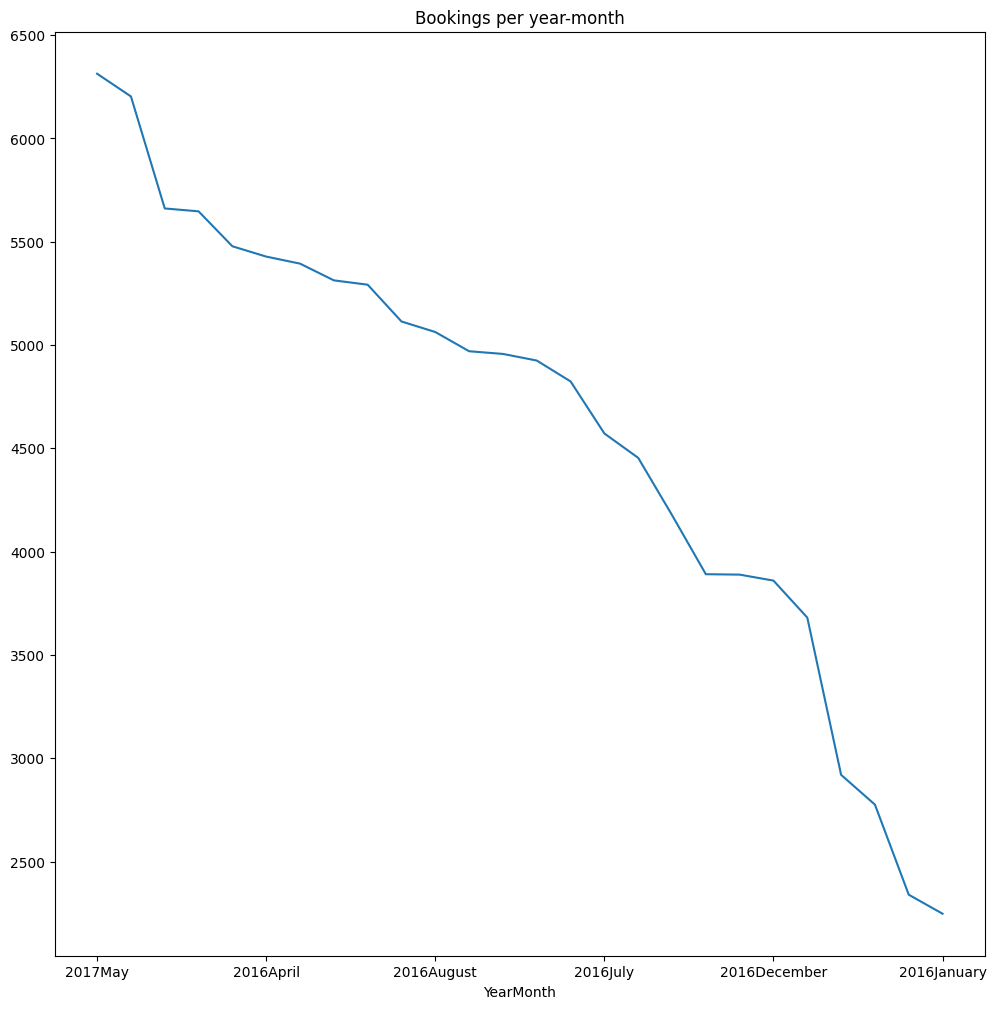

In [25]:
# ❓ Make a line plot that shows the bookings over time

fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title("Bookings per year-month")
hotel_df.value_counts("YearMonth").plot(legend=False, ax=ax)

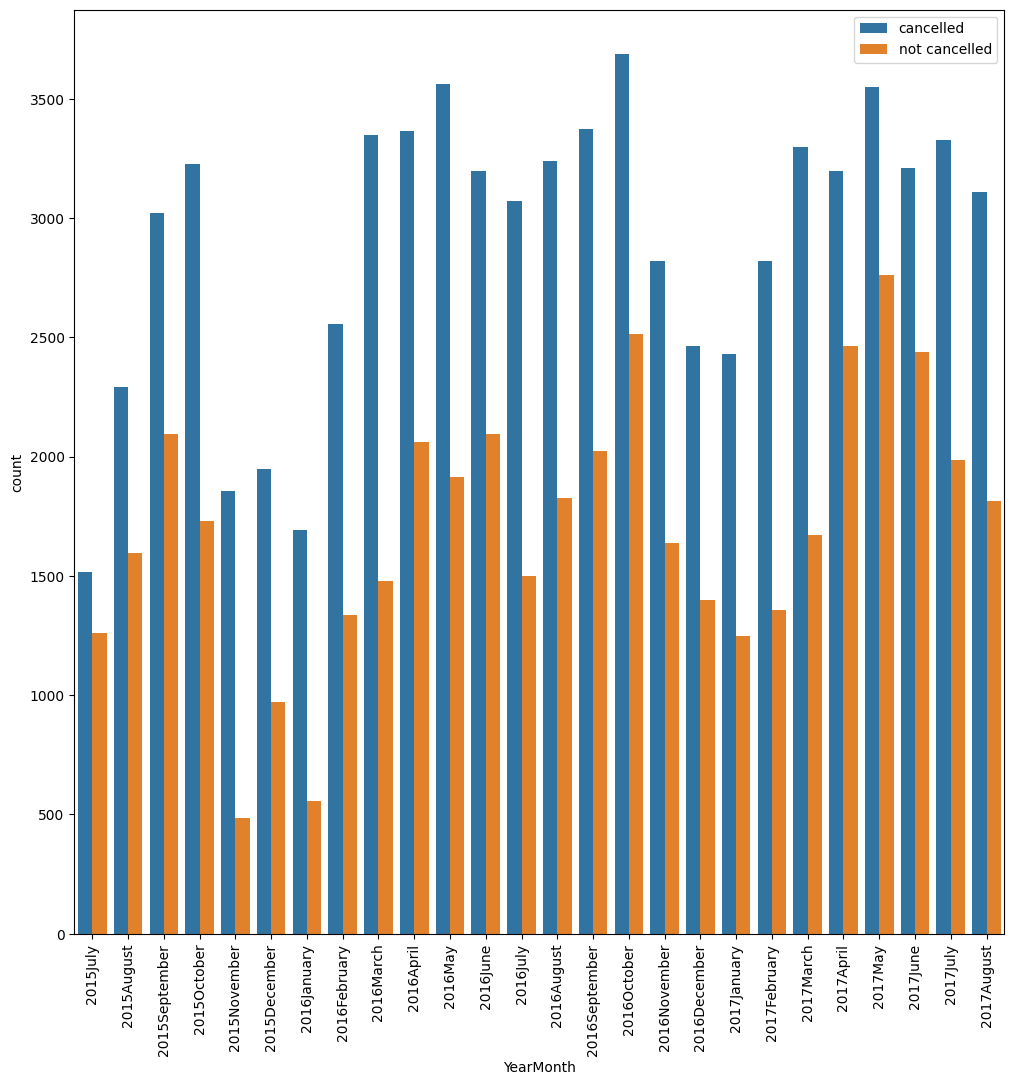

In [26]:
# ❓ Make a line plot that shows the bookings over time. Divide into cancellations and not cancelled bookings.

fig, ax = plt.subplots(figsize=(12,12))
sns.countplot(data=hotel_df, x="YearMonth", hue="IsCanceled", ax=ax)
ax.tick_params(axis='x', rotation=90)
ax.legend(labels=["cancelled", "not cancelled"]);

In [27]:
# Alternatively
px.histogram(hotel_df, x='YearMonth', color="IsCanceled", barmode='group')

c:\Users\u0086305\Documents\DAML\DAML course materials\daml-student-repo\.venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


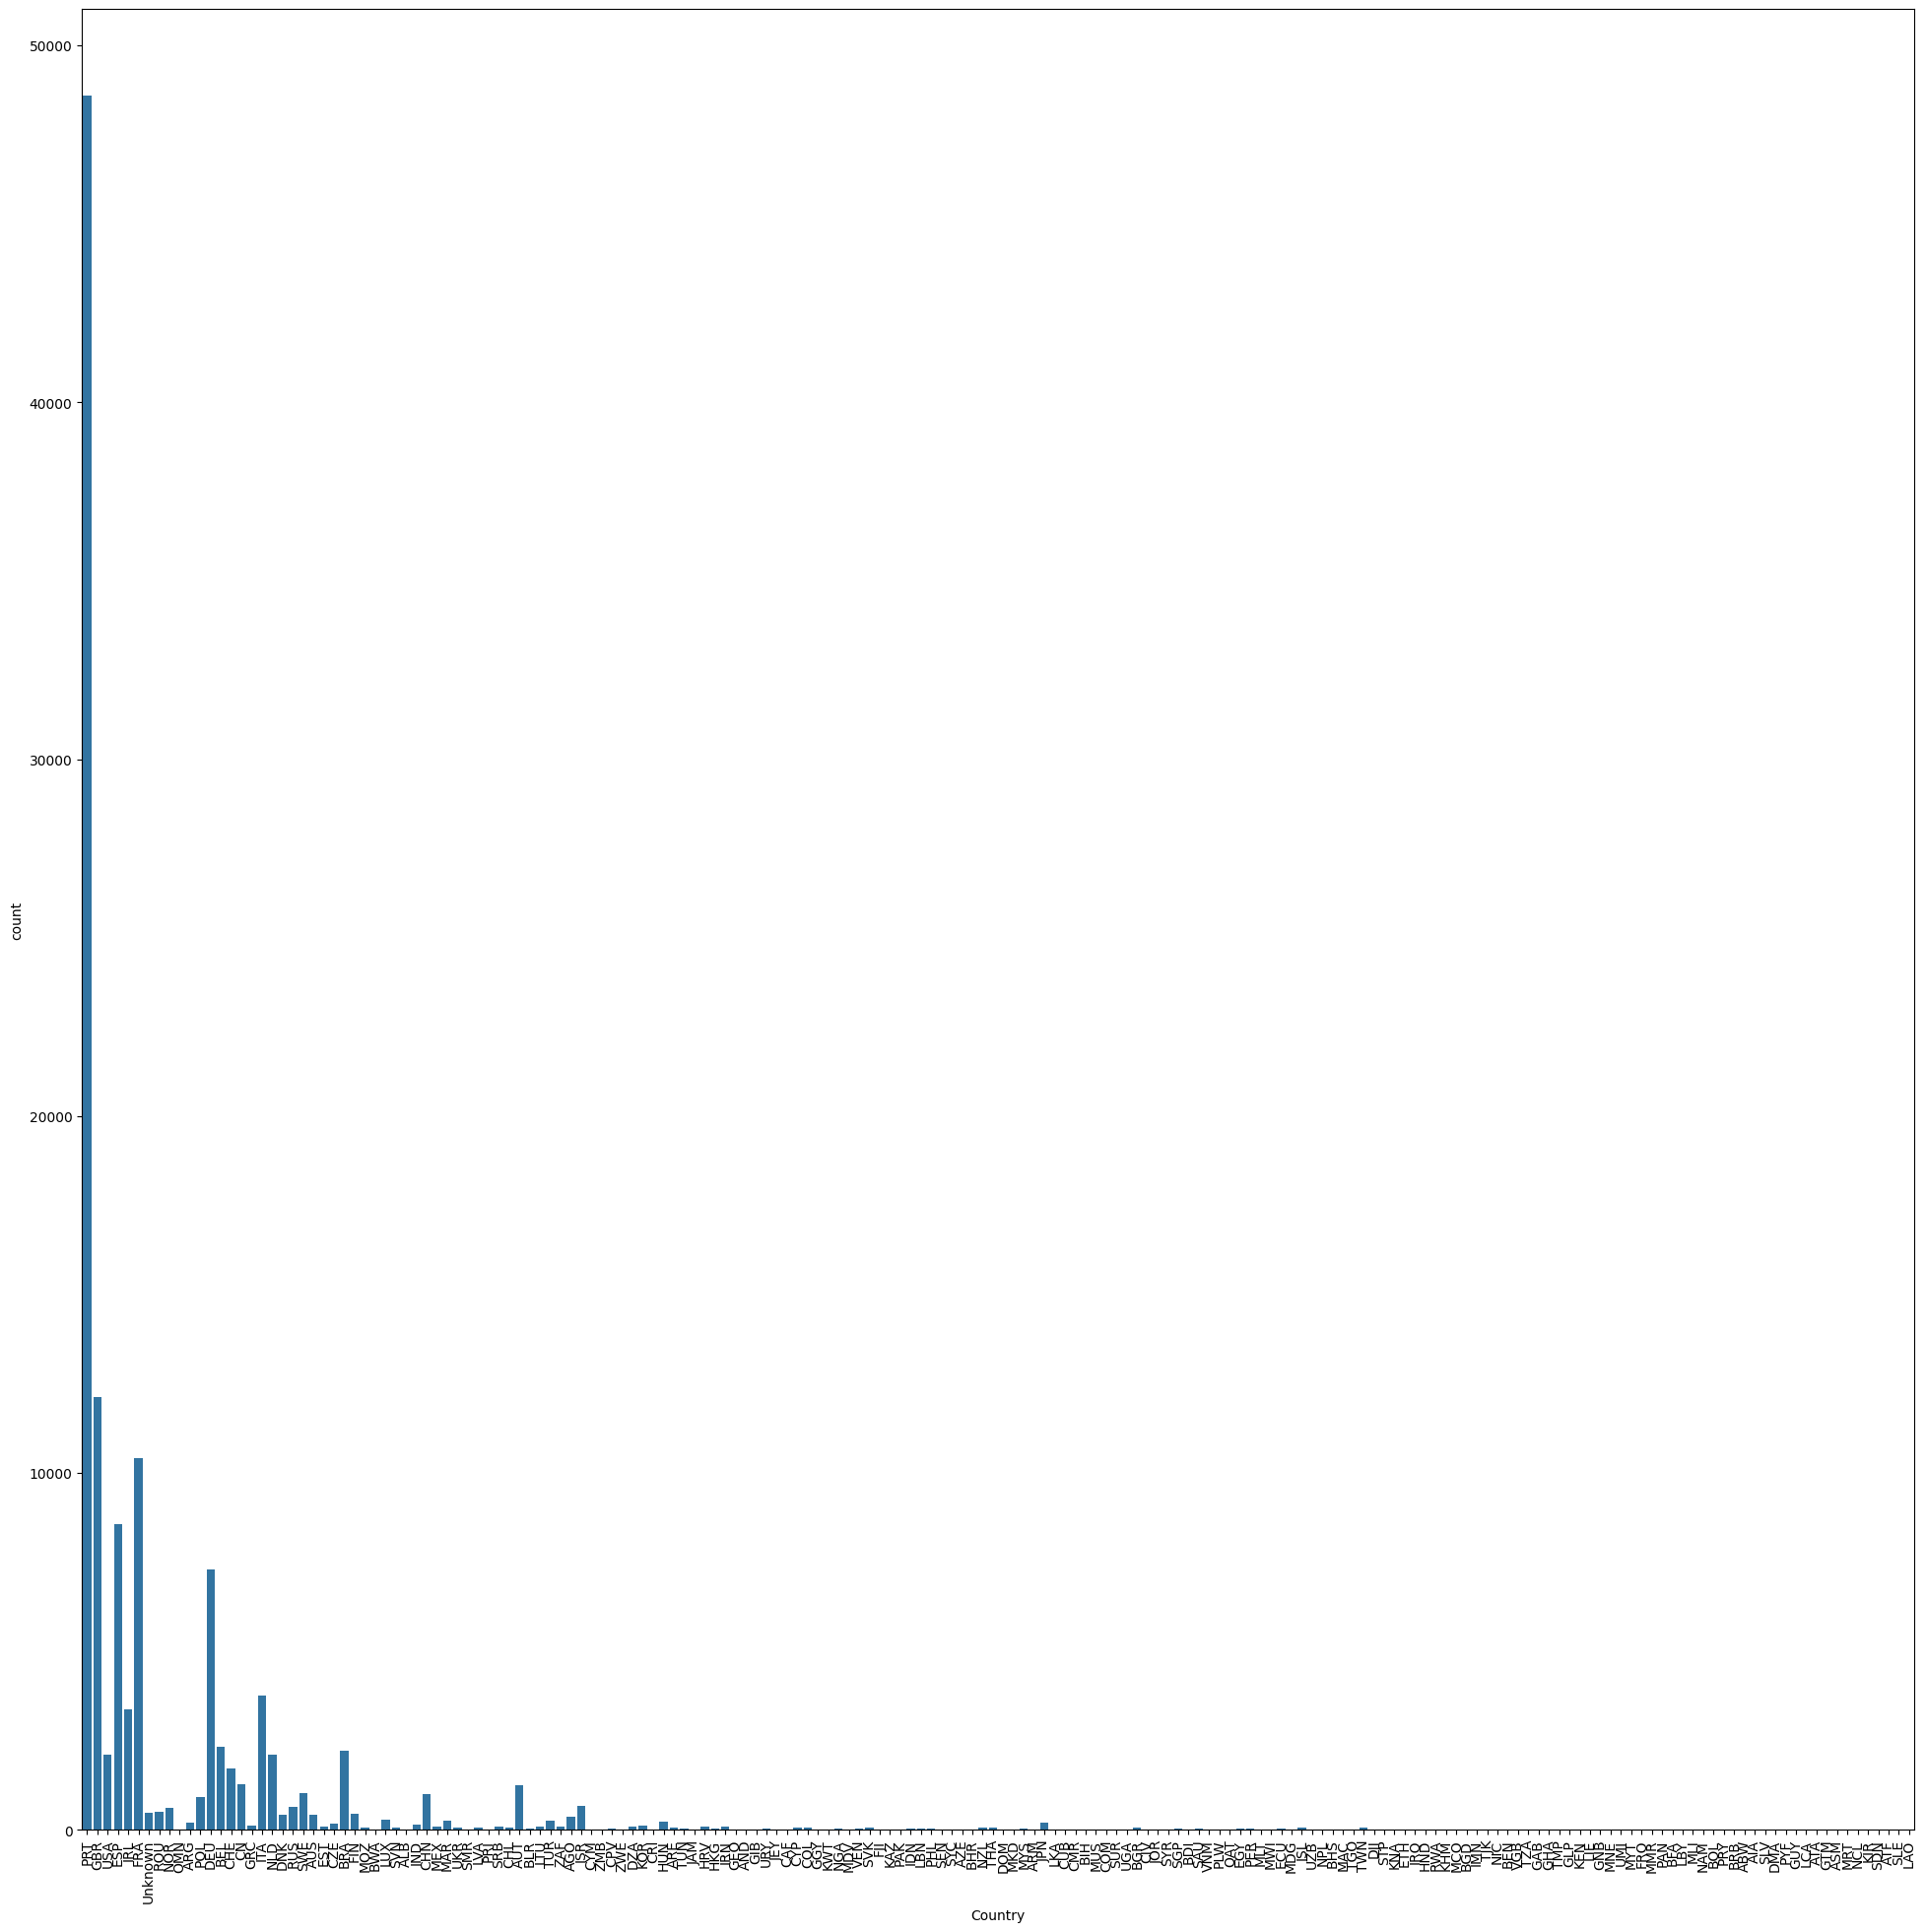

In [28]:
# ❓ Where do the guests come from?

fig, ax = plt.subplots(figsize=(24,24))
sns.countplot(data=hotel_df, x="Country", ax=ax)
ax.tick_params(axis='x', rotation=90)

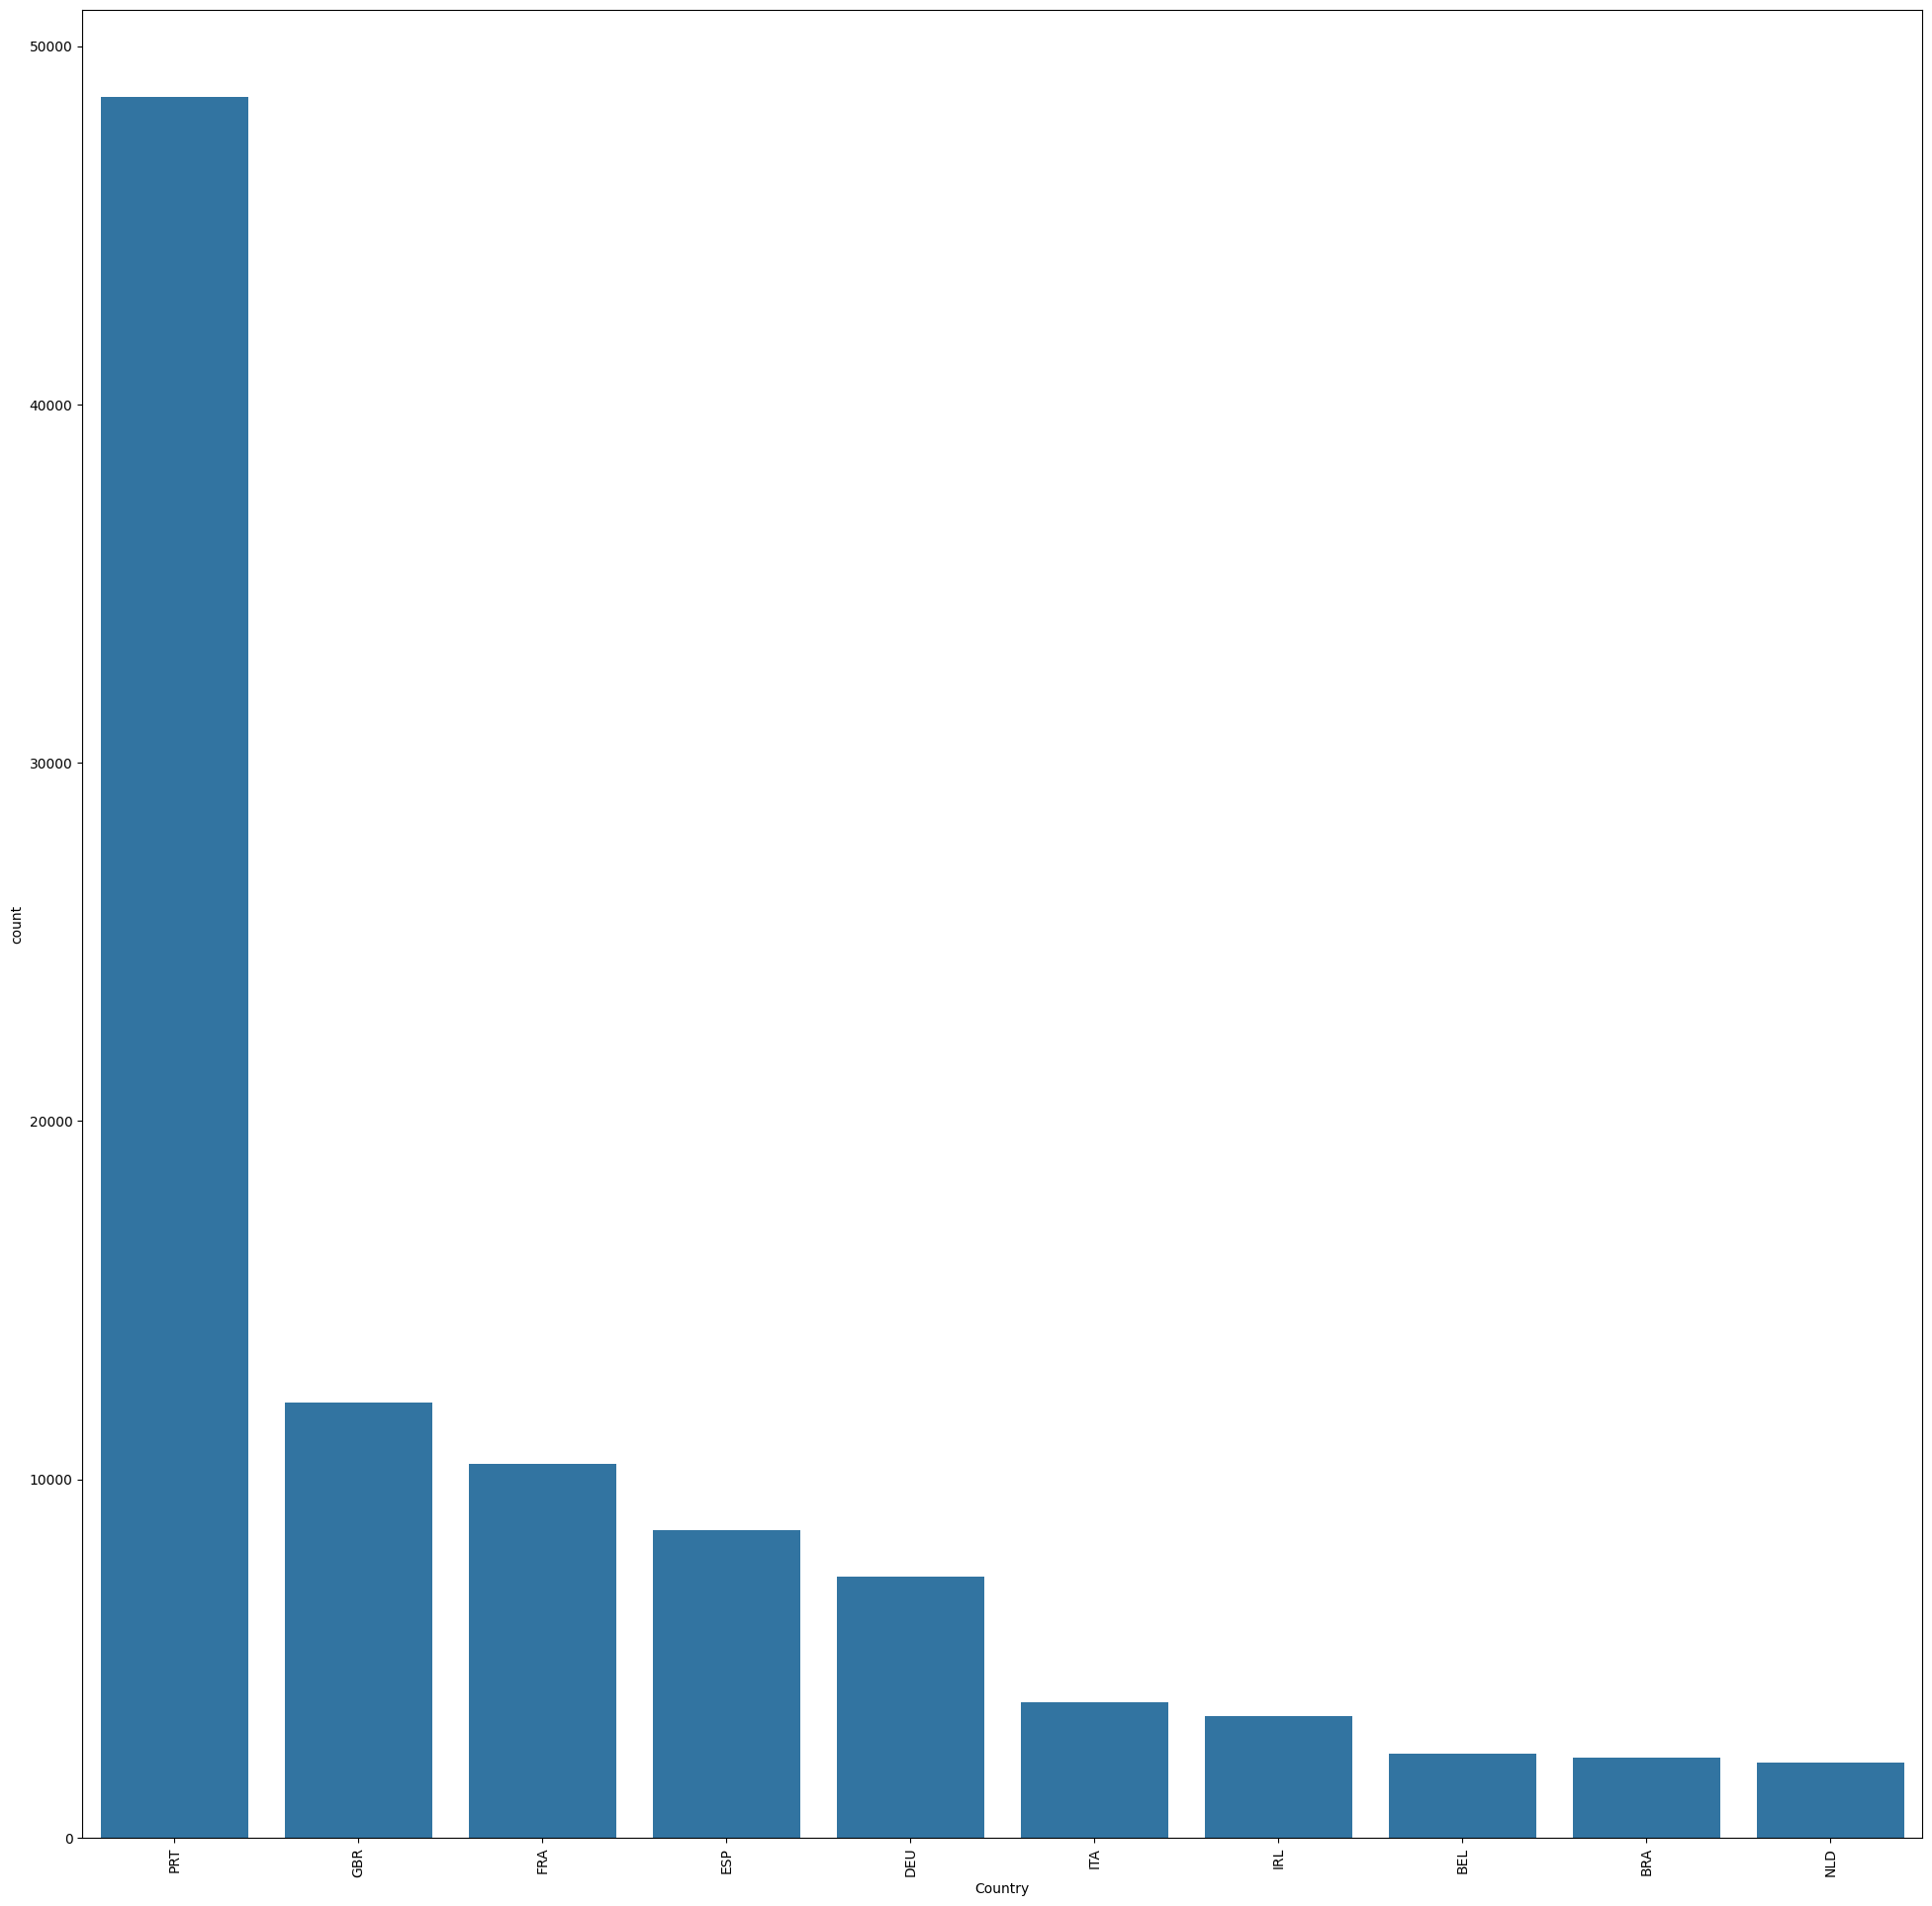

In [29]:
# ❓ Extra, just the top 10

fig, ax = plt.subplots(figsize=(24,24))
sns.countplot(data=hotel_df, x="Country", order = hotel_df['Country'].value_counts().iloc[:10].index, ax=ax)
ax.tick_params(axis='x', rotation=90)


In [30]:
# Extra extra

countryData = hotel_df.groupby("Country", as_index=False).size()

countryData.rename(columns={"size": "Number of Guests"}, inplace=True)
total_guests = countryData["Number of Guests"].sum()
countryData["Guests in %"] = np.round(countryData["Number of Guests"] / total_guests * 100, 2)

guest_map = px.choropleth(countryData,
                    locations=countryData.Country,
                    color=countryData["Guests in %"],
                    hover_name=countryData.Country, 
                    title="Home country of guests",
                    width=1200,
                    height=800)
guest_map.show()

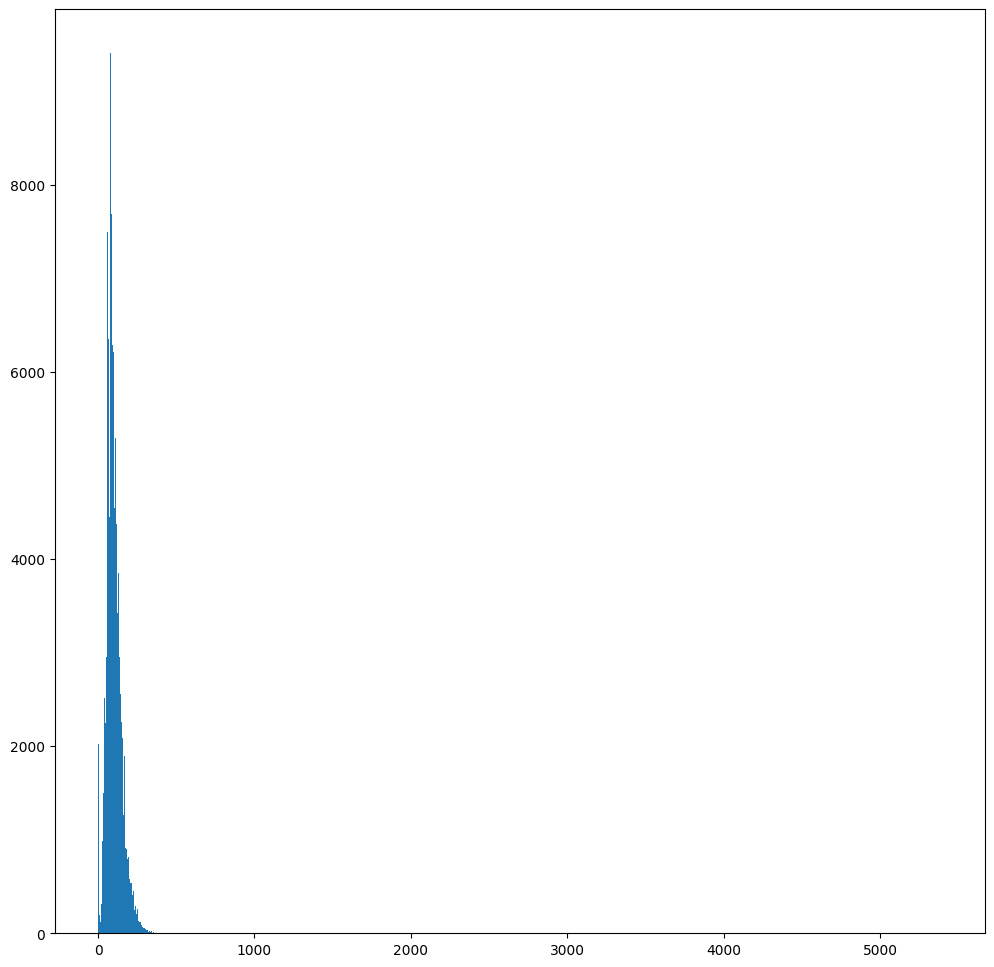

In [31]:
# ❓ How much do they pay per night (hint distribution of ...)

fig, ax = plt.subplots(figsize=(12,12))
ax.hist(hotel_df["ADR"], bins=1000);

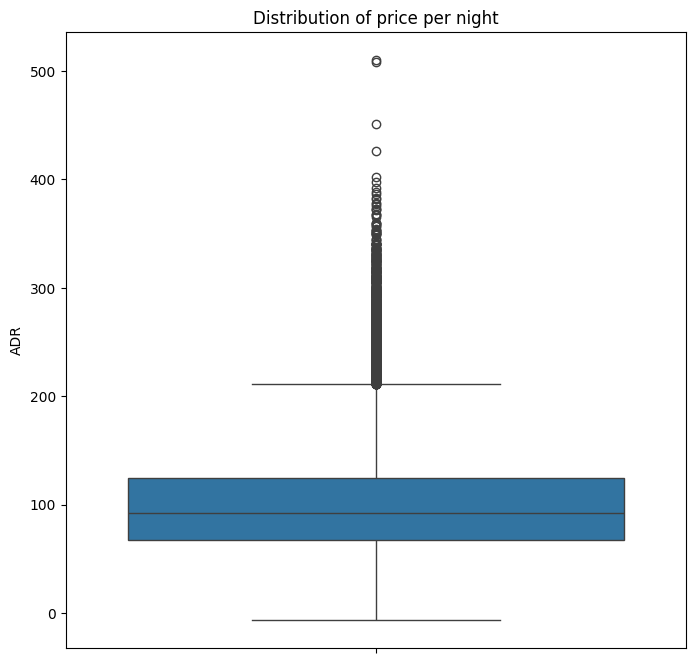

In [32]:
# ❓ How much do they pay per night (hint distribution of ...)
# Hint, only use the customers that didn't cancel

fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Distribution of price per night")
sns.boxplot(data=hotel_df.loc[hotel_df["IsCanceled"] == 0], y="ADR", ax=ax);

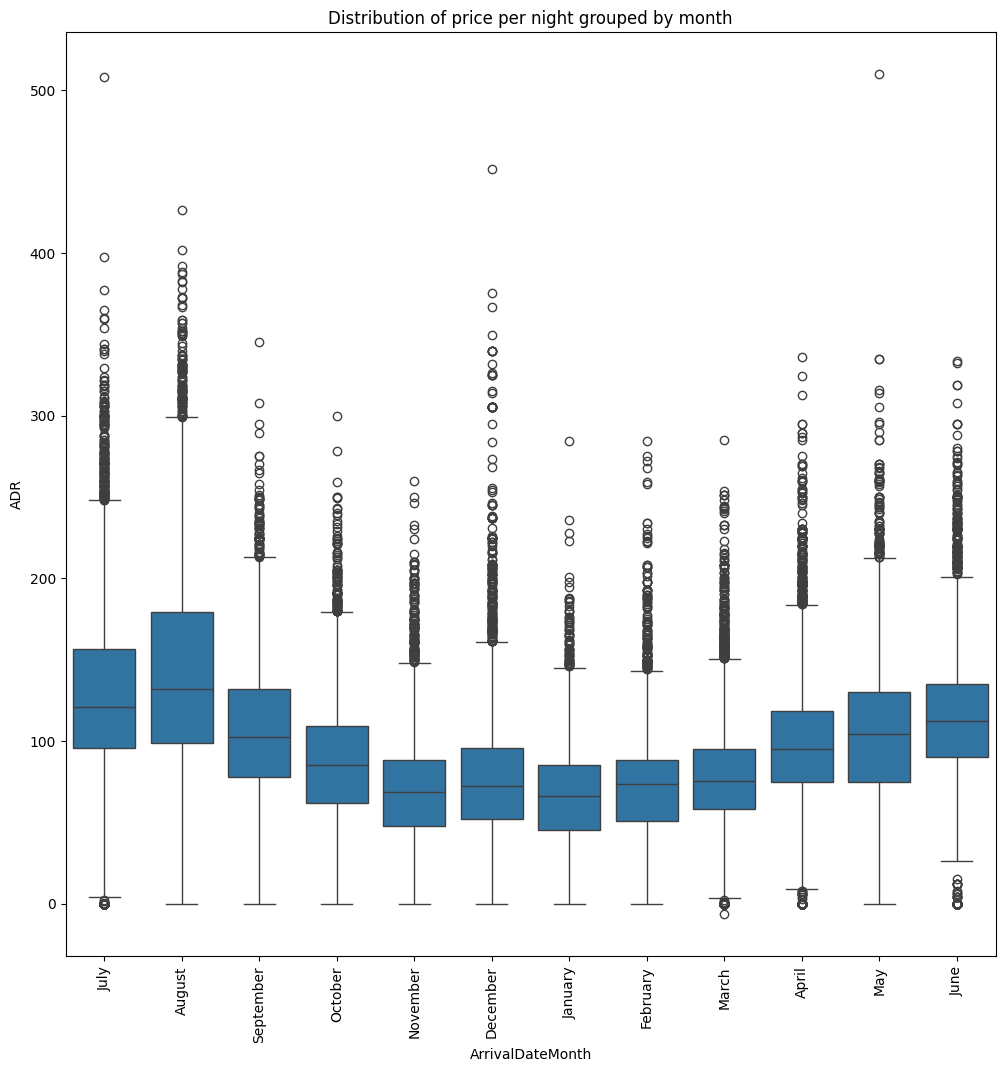

In [33]:
# ❓ Does the price vary per time of the year? (hint: distribution of ... per month or per year month)
# Hint, only use the customers that didn't cancel

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title("Distribution of price per night grouped by month")
sns.boxplot(data=hotel_df.loc[hotel_df["IsCanceled"] == 0],x="ArrivalDateMonth", y="ADR", ax=ax);
ax.tick_params(axis='x', rotation=90)

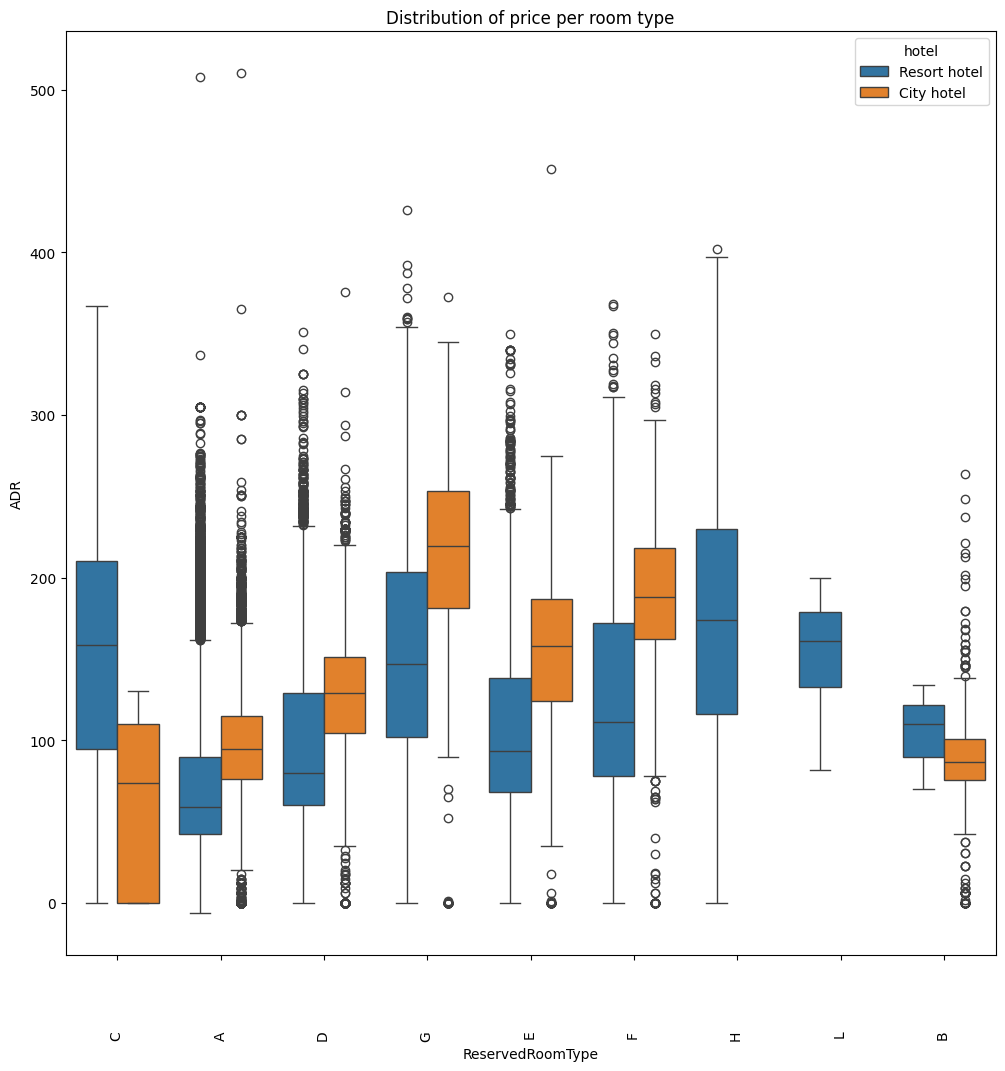

In [34]:
# ❓ Is there a difference in daily rate for both hotels?

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title("Distribution of price per room type")
sns.boxplot(data=hotel_df.loc[hotel_df["IsCanceled"] == 0],x="ReservedRoomType", y="ADR", hue= "hotel", ax=ax);
ax.tick_params(axis='x', rotation=90)

In [35]:
# ❓ How long do customers stay? Are there any noticeable differences? (hint: you can analyze this variable over YearMonth)
# Hint, only use the customers that didn't cancel

hotel_df["stayLength"] = hotel_df.StaysInWeekNights + hotel_df.StaysInWeekendNights
px.box(data_frame = hotel_df.loc[hotel_df["IsCanceled"] == 0], x = "ArrivalDateMonth", y= "stayLength", title="Stay length per month")

<Axes: title={'center': 'Correlation chart'}>

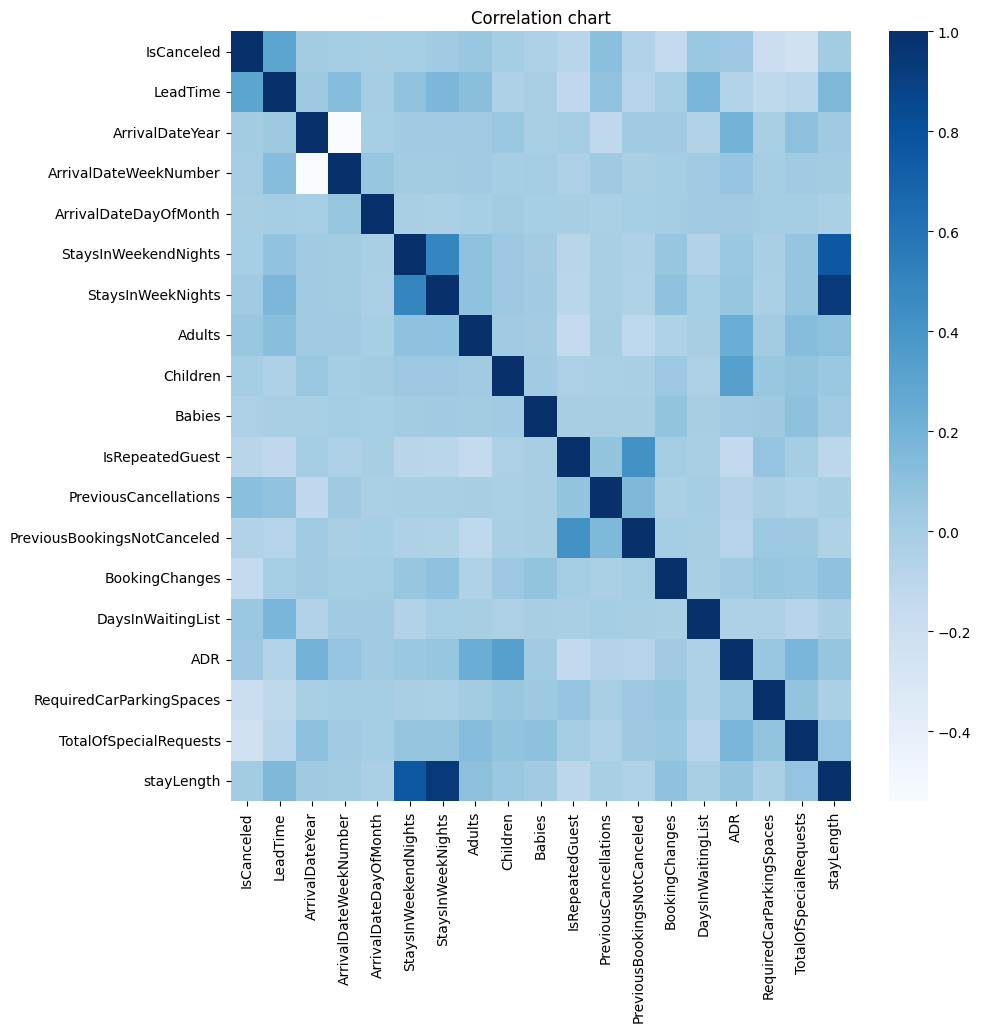

In [36]:
# ❓ What variables are correlated with cancellations? (hint use numeric_only=True when making the correlations)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Correlation chart")
sns.heatmap(hotel_df.corr(numeric_only=True), cmap= "Blues",ax=ax)

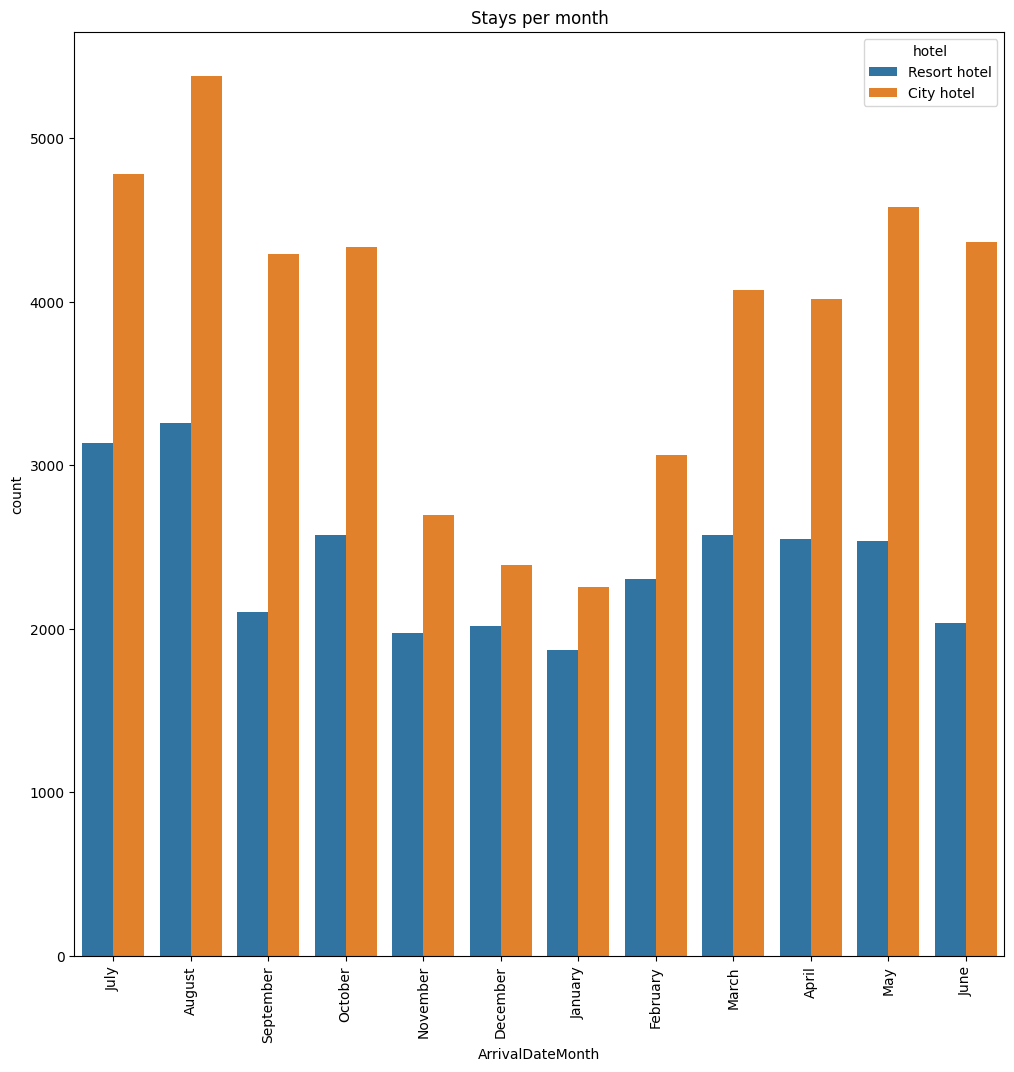

In [37]:
# ❓How does the evolution of bookings per year look like?

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title("Stays per month")
sns.countplot(data=hotel_df.loc[hotel_df["IsCanceled"] == 0],x="ArrivalDateMonth", hue="hotel", ax=ax);
ax.tick_params(axis='x', rotation=90)

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer # missing values
from sklearn.preprocessing import StandardScaler # Scaling the data to have a mean of 0 and a standard deviation of 1 
from sklearn.pipeline import make_pipeline # Composing multiple steps behind each other
from sklearn.compose import make_column_transformer # Applying a transformer to a subset of columns
from sklearn.preprocessing import OneHotEncoder # Turning categorical data to numeric by making a column for each unique value and denoting it as 0 or 1
from sklearn.model_selection import train_test_split

In [39]:
num_features = ["LeadTime","ArrivalDateWeekNumber","ArrivalDateDayOfMonth",
                "StaysInWeekendNights","StaysInWeekNights","Adults","Children",
                "Babies","PreviousCancellations",
                "PreviousBookingsNotCanceled", "ADR"]

cat_features = ["hotel","ArrivalDateMonth","Meal","MarketSegment", "IsRepeatedGuest", "RequiredCarParkingSpaces", "TotalOfSpecialRequests",
                "DistributionChannel","ReservedRoomType","DepositType","CustomerType"]

### ❓ What variable would be a bad idea to one hot encode?


In [40]:
# Divide the data into X and y

X = hotel_df.drop(["IsCanceled"], axis=1)
y = hotel_df["IsCanceled"]

In [41]:
# Make a pipeline for the categorical values
cat_transformer = make_pipeline(SimpleImputer(strategy="constant", fill_value="Unknown"), OneHotEncoder(handle_unknown='ignore'))


In [42]:
# Make a pipeline for the numeric values

num_transformer = make_pipeline(SimpleImputer(strategy="constant"), (StandardScaler()))

In [43]:
# compose the two pipelines you made

preprocessor = make_column_transformer((num_transformer, num_features), (cat_transformer, cat_features))


In [44]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [45]:
from sklearn.linear_model import LogisticRegressionCV # linear regression for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier # Fits many decision trees sequentially. Each tree is trained to improve on the performance of all the previous trees.
from sklearn.ensemble import RandomForestClassifier # Fits many decision trees in parallel with some added randomness. The final prediction is the average of all trees..


### ❗ Make sure to use n_jobs = -1 when doing cross validation. Training these models can take a while.

### ❓ What evaluation metrics do you already know for classification models? Which one will you use and why?

From the error output if you use an invalid scoring metric:

<small>The 'scoring' parameter of cross_val_score must be a str among {'neg_root_mean_squared_log_error', 'd2_absolute_error_score', 'normalized_mutual_info_score', 'neg_root_mean_squared_error', 'average_precision', 'f1_samples', 'precision_weighted', 'explained_variance', 'neg_negative_likelihood_ratio', 'mutual_info_score', 'precision_macro', 'recall_macro', 'accuracy', 'jaccard', 'jaccard_micro', 'homogeneity_score', 'jaccard_samples', 'rand_score', 'recall_micro', 'recall_weighted', 'adjusted_rand_score', 'precision_micro', 'f1_micro', 'balanced_accuracy', 'roc_auc_ovr', 'recall', 'neg_mean_squared_log_error', 'f1_weighted', 'f1_macro', 'neg_median_absolute_error', 'neg_brier_score', 'roc_auc', 'roc_auc_ovo_weighted', 'neg_mean_absolute_percentage_error', 'precision_samples', 'neg_mean_absolute_error', 'adjusted_mutual_info_score', 'neg_mean_squared_error', 'jaccard_macro', 'recall_samples', 'f1', 'r2', 'completeness_score', 'jaccard_weighted', 'matthews_corrcoef', 'precision', 'max_error', 'neg_log_loss', 'fowlkes_mallows_score', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'positive_likelihood_ratio', 'v_measure_score'}, a callable or None.</small>

What does this mean for us?

For classification models, we've seen accuracy, precision, recall, and AUC in class. Many people default to accuracy - how many instances did we get correct? But we've seen that precision and recall give us information about the different kinds of errors, useful when one type is much worse than another. We might want to train according to one or the other. AUC sort of provides a balance between the types of errors.

In [46]:
# Evaluate logistic regression

lr_pipe = make_pipeline(preprocessor, LogisticRegressionCV())
results_lr = cross_val_score(lr_pipe, X_train, y_train, cv=4, scoring="roc_auc_ovr", n_jobs=-1) 

In [47]:
np.mean(results_lr)

0.8507098441286256

In [48]:
# Evaluate decision tree

dt_pipe = make_pipeline(preprocessor, DecisionTreeClassifier())
results_dt = cross_val_score(dt_pipe, X_train, y_train, cv=4, scoring="roc_auc_ovr", n_jobs=-1) 

In [49]:
np.mean(results_dt)

0.8011667031536701

In [50]:
# Evaluate gradient boosting

gb_pipe = make_pipeline(preprocessor, HistGradientBoostingClassifier())
results_gb = cross_val_score(gb_pipe, X_train, y_train, cv=4, scoring="roc_auc_ovr", n_jobs=-1) 

In [51]:
np.mean(results_gb)

0.8992455871388605

In [52]:
# Evaluate random forest

rf_pipe = make_pipeline(preprocessor, RandomForestClassifier())
results_rf = cross_val_score(rf_pipe, X_train, y_train, cv=4, scoring="roc_auc_ovr", n_jobs=-1) 

In [53]:
np.mean(results_rf)

0.9202468092836138

### ❓ Motivate which model is the best and use it on the final part of the data


In this run random forest is the best performing model.

In [54]:
from sklearn.metrics import roc_auc_score

In [55]:
# Fit the final model
rf_pipe.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Make your predictions
y_pred = rf_pipe.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [ ]:
# Calculate the final performance

roc_auc_score(y_test, y_pred)

0.8387740859619225